In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
my_arrays_final = np.load("/content/drive/MyDrive/numpy_data_CNN_128*128.npz", allow_pickle=True)


In [4]:
# Extract the X_train, y_train, X_test, and y_test arrays from the data
X_train = my_arrays_final['X_train']
y_train = my_arrays_final['y_train']
X_test = my_arrays_final['X_test']
y_test = my_arrays_final['y_test']

In [5]:
# Print the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6052, 128, 128, 3)
y_train shape: (6052,)
X_test shape: (1514, 128, 128, 3)
y_test shape: (1514,)


In [6]:
featuresTrain_1 = np.load('/content/drive/MyDrive/FineTuneVGGfeatures_128*128_train.npy')


In [7]:
featuresTrain_1.shape

(6052, 17)

In [8]:
featuresTrain_1

array([[1.00000000e+00, 3.29711500e-35, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.30926535e-01, 4.62268710e-01, 3.96285951e-01, ...,
        7.53252360e-04, 7.51744607e-04, 7.52224063e-04],
       [1.00000000e+00, 8.54353743e-09, 1.16428216e-20, ...,
        1.15507127e-36, 0.00000000e+00, 9.64964371e-32],
       ...,
       [2.56786327e-04, 5.94397483e-04, 9.99148726e-01, ...,
        1.18043455e-12, 2.22039329e-08, 3.37176753e-09],
       [5.32326885e-05, 9.99924183e-01, 2.21049941e-05, ...,
        1.09287995e-11, 1.06988324e-07, 2.53110821e-09],
       [9.45555512e-03, 2.99901031e-02, 9.60460126e-01, ...,
        1.23643503e-07, 1.35173323e-05, 4.30812588e-06]], dtype=float32)

In [9]:
featuresVal_1 = np.load('/content/drive/MyDrive/FineTuneVGGfeatures_128*128_val.npy')


In [10]:
featuresTrain_1[:1000]

array([[1.00000000e+00, 3.29711500e-35, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.30926535e-01, 4.62268710e-01, 3.96285951e-01, ...,
        7.53252360e-04, 7.51744607e-04, 7.52224063e-04],
       [1.00000000e+00, 8.54353743e-09, 1.16428216e-20, ...,
        1.15507127e-36, 0.00000000e+00, 9.64964371e-32],
       ...,
       [2.16786494e-03, 9.95675743e-01, 2.12571211e-03, ...,
        3.73479665e-08, 6.86103385e-06, 8.20060677e-07],
       [3.02035164e-06, 7.48354432e-06, 9.99989510e-01, ...,
        3.23674450e-17, 1.75766707e-10, 4.02050528e-12],
       [1.00000000e+00, 6.00036154e-09, 5.78684201e-26, ...,
        0.00000000e+00, 2.21319725e-36, 3.32621027e-34]], dtype=float32)

In [11]:
featuresVal_1.shape

(1514, 17)

In [21]:
# Defining manifold learning algorithms to compare
manifold_algorithms = [
    ('PCA', PCA(n_components=2)),
    ('Isomap', Isomap(n_components=2)),
    ('LLE', LocallyLinearEmbedding(n_components=2)),
    ('MDS', MDS(n_components=2)),
    ('SE', SpectralEmbedding(n_components=2)),
    ('t-SNE', TSNE(n_components=2, perplexity=30))
]

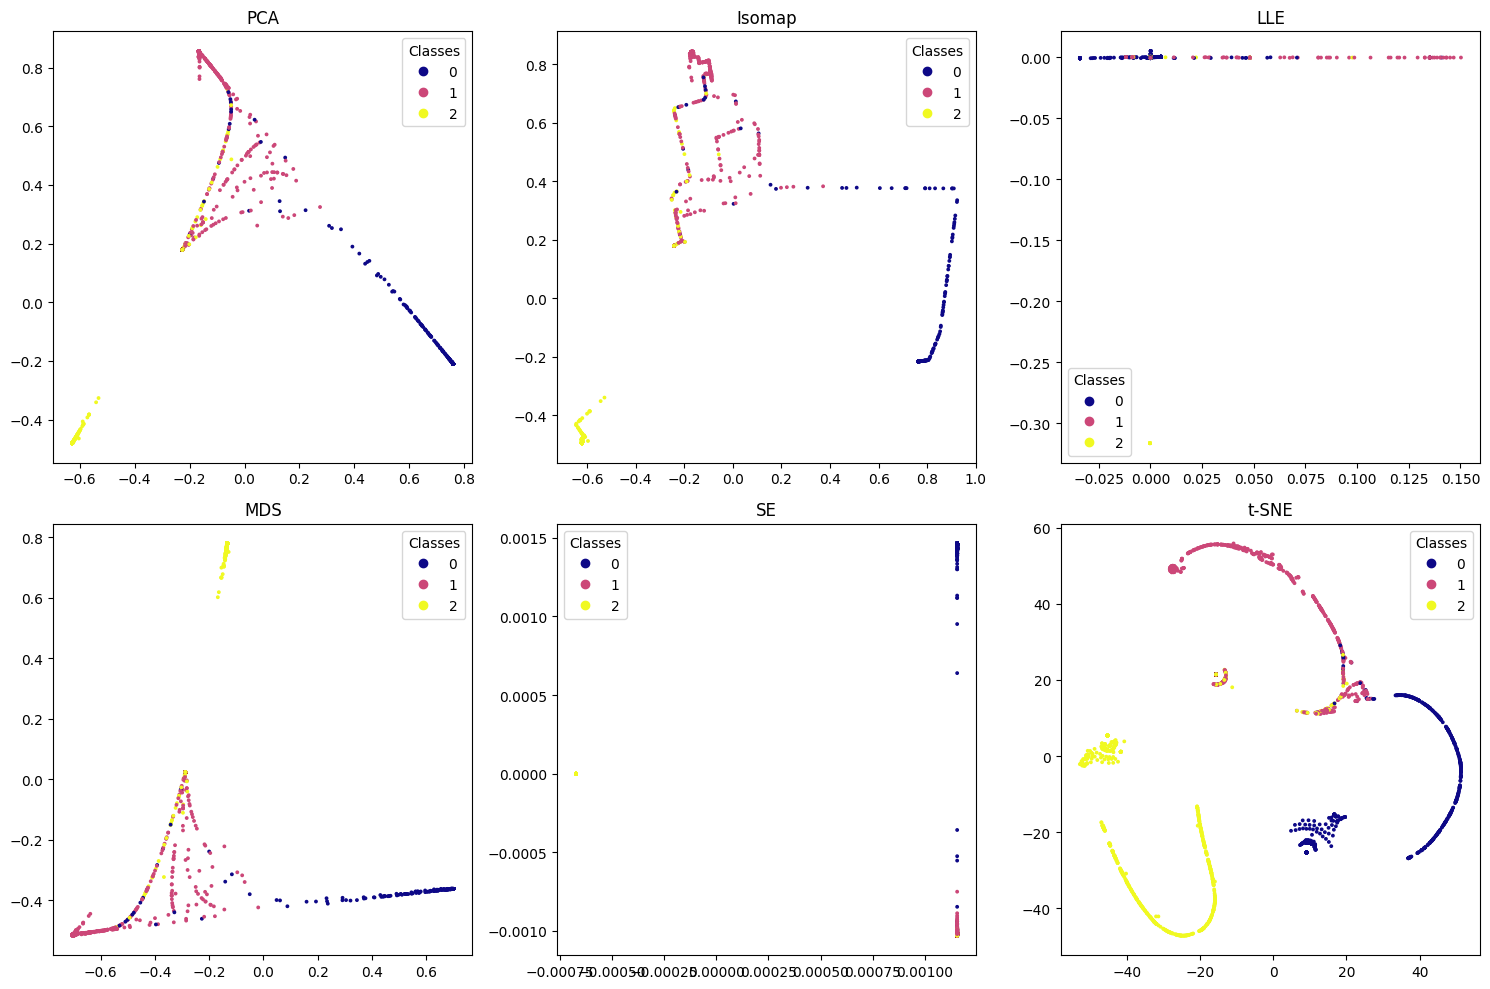

In [25]:
# Plot the manifold results
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.ravel()

for i, (name, algo) in enumerate(manifold_algorithms):
    X_manifold = algo.fit_transform(featuresTrain_1[:3000])
    scatter = axs[i].scatter(X_manifold[:, 0], 
                             X_manifold[:, 1], 
                             c=y_train[:3000], 
                             s=3, 
                             cmap='plasma', 
                             label=y_train[:3000])
    axs[i].set_title(name)
    axs[i].legend(*scatter.legend_elements(), loc="best", title="Classes")

plt.tight_layout()
plt.show()

In [27]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=2)
X_pca = pca.fit_transform(featuresTrain_1)

In [30]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y_train)
fig.update_layout(
    title="PCA visualization of Image Classification dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(featuresTrain_1)
tsne.kl_divergence_

0.2069518119096756

In [34]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y_train)
fig.update_layout(
    title="t-SNE visualization of image Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [36]:
import numpy as np

perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(featuresTrain_1)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_train_tsne = tsne.fit_transform(featuresTrain_1)

tsne.kl_divergence_

0.2569796144962311

In [49]:
fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=y_train)
fig.update_layout(
    title="t-SNE visualization of image classification",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [16]:
model = RandomForestClassifier(50)
model.fit(featuresTrain_1, y_train)

results = model.predict(featuresTrain_1)
train_accuracy = accuracy_score(y_train, results)
print("Training Accuracy:", train_accuracy)

# evaluate the model

results = model.predict(featuresVal_1)
test_accuracy = accuracy_score(y_test, results)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9018506278916061
Testing Accuracy: 0.6334214002642008


In [17]:
model1 = LogisticRegression(random_state=0, solver='lbfgs',dual= False,max_iter=1000, multi_class='multinomial').fit(featuresTrain_1, y_train)

results_1 = model1.predict(featuresTrain_1)
train_accuracy = accuracy_score(y_train, results_1)
print("Training Accuracy:", train_accuracy)

#evaluate the model

results_1 = model1.predict(featuresVal_1)
test_accuracy = accuracy_score(y_test, results_1)
print("Testing Accuracy:", test_accuracy)



Training Accuracy: 0.8849966953073364
Testing Accuracy: 0.6360634081902246
